In [7]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from mlfinlab.multi_product.etf_trick import get_futures_roll_series
from mlfinlab.data_structures import time_data_structures
# Get processed tick data csv from url
tick_data_url = "https://raw.githubusercontent.com/jjakimoto/finance_ml/master/datasets/Google.csv"

google_df = pd.read_csv(tick_data_url, parse_dates=['Date'], index_col='Date')  
len(google_df)


3125

In [7]:
from mlfinlab.data_structures import standard_data_structures
# Get processed tick data csv from url
tick_data_url = "https://raw.githubusercontent.com/hudson-and-thames/example-data/main/processed_tick_data.csv"
tick_bars = standard_data_structures.get_tick_bars(
    tick_data_url, threshold=5500, batch_size=10000, verbose=False
)
tick_bars  

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
2023-03-01 18:53:51.423,5500,804.25,806.00,803.00,804.25,23119,12664,5500,18603064.25
2023-03-01 21:29:57.152,11000,804.25,807.50,803.75,805.50,18940,9118,5500,15265434.25
2023-03-02 01:28:59.673,16500,805.50,808.00,804.25,807.50,15011,8665,5500,12108230.50
2023-03-02 02:22:33.934,22000,807.50,808.50,806.25,808.25,15417,8034,5500,12454098.50
2023-03-02 03:07:48.372,27500,808.25,810.00,807.75,809.50,15328,9110,5500,12399125.00
...,...,...,...,...,...,...,...,...,...
2023-03-03 14:08:32.610,522500,801.00,802.50,800.50,802.25,24579,14868,5500,19699572.25
2023-03-03 14:13:36.066,528000,802.25,802.50,801.25,802.25,23173,11796,5500,18583395.25
2023-03-03 14:18:40.995,533500,802.25,803.00,801.50,801.75,22403,10596,5500,17972674.25


In [8]:
volume_bars = standard_data_structures.get_volume_bars(
    tick_data_url, threshold=28000, batch_size=1000000, verbose=False
)
volume_bars

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
2023-03-01 19:32:23.387,7171,804.25,806.00,803.00,806.00,28031,15442,7171,22557998.75
2023-03-02 01:18:21.928,16133,806.00,808.00,804.25,807.50,28003,14566,8962,22582320.50
2023-03-02 02:50:32.992,25976,807.50,810.00,806.25,808.75,28000,15550,9843,22631902.25
2023-03-02 04:57:09.236,35968,808.75,811.25,807.75,810.00,28000,14211,9992,22674594.25
2023-03-02 07:04:32.076,43461,810.00,812.50,809.75,811.50,28013,17300,7493,22720645.25
...,...,...,...,...,...,...,...,...,...
2023-03-03 14:08:14.698,521168,800.50,802.25,800.25,802.00,28000,16708,6296,22429621.00
2023-03-03 14:13:20.950,527711,802.00,802.50,801.25,802.00,28078,14482,6543,22517776.50
2023-03-03 14:20:00.511,534436,802.25,803.00,801.25,801.25,28002,13191,6725,22462073.00


In [9]:
volume_bars_average = standard_data_structures.get_volume_bars(
    tick_data_url, threshold=28000, batch_size=1000000, verbose=False, average=True
)
volume_bars_average

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value,average_volume
date_time,,,,,,,,,,
2023-03-01 19:32:23.387,7171,804.25,806.00,803.00,806.00,28031,15442,7171,22557998.75,3.908939
2023-03-02 01:18:21.928,16133,806.00,808.00,804.25,807.50,28003,14566,8962,22582320.50,3.124637
2023-03-02 02:50:32.992,25976,807.50,810.00,806.25,808.75,28000,15550,9843,22631902.25,2.844661
2023-03-02 04:57:09.236,35968,808.75,811.25,807.75,810.00,28000,14211,9992,22674594.25,2.802242
2023-03-02 07:04:32.076,43461,810.00,812.50,809.75,811.50,28013,17300,7493,22720645.25,3.738556
...,...,...,...,...,...,...,...,...,...,...
2023-03-03 14:08:14.698,521168,800.50,802.25,800.25,802.00,28000,16708,6296,22429621.00,4.447268
2023-03-03 14:13:20.950,527711,802.00,802.50,801.25,802.00,28078,14482,6543,22517776.50,4.291304
2023-03-03 14:20:00.511,534436,802.25,803.00,801.25,801.25,28002,13191,6725,22462073.00,4.163866


In [10]:
# Dollar Bars
dollar_bars = standard_data_structures.get_dollar_bars(
    tick_data_url, threshold=10000000, batch_size=1000000, verbose=False
)
print("Dollar Bars:")
print(dollar_bars)
print(f"Dollar bars shape: {dollar_bars.shape}")

Dollar Bars:
                         tick_num    open    high     low   close  volume   
date_time                                                                   
2023-03-01 17:21:07.831      2883  804.25  806.00  803.00  804.50   12434  \
2023-03-01 19:10:41.010      6121  804.25  806.00  803.75  805.00   12423   
2023-03-01 20:27:55.076      9590  805.00  807.50  804.75  806.25   12407   
2023-03-02 00:05:02.333     13827  806.25  808.00  804.25  806.75   12407   
2023-03-02 02:02:16.730     18561  806.75  808.50  806.00  807.75   12390   
...                           ...     ...     ...     ...     ...     ...   
2023-03-03 14:20:00.544    534458  802.50  802.50  801.00  801.00   12470   
2023-03-03 14:24:08.654    537230  801.00  802.00  800.50  800.50   12482   
2023-03-03 14:28:32.192    540204  800.50  801.25  800.50  800.50   12587   
2023-03-03 14:32:56.096    543407  800.50  802.25  800.50  801.25   12514   
2023-03-03 14:36:46.895    546425  801.25  802.25  801.00  801.

In [11]:
from mlfinlab.data_structures.imbalance_data_structures import (
     get_ema_dollar_imbalance_bars,
     get_const_dollar_imbalance_bars,
     )
 # Get processed tick data csv from url
# tick_data_url = "https://raw.githubusercontent.com/hudson-and-thames/example-data/main/processed_tick_data.csv"
 # EMA Dollar Imbalance Bars
dollar_imbalance_ema, df_thresholds = get_ema_dollar_imbalance_bars(
    tick_data_url,
    num_prev_bars=3,
    exp_num_ticks_init=10000,
    exp_num_ticks_constraints=[100, 1000],
    expected_imbalance_window=1000,
    batch_size=10000,
    verbose=False,
    analyse_thresholds=True,
)  # Also return thresholds


In [12]:
len(dollar_imbalance_ema)

130

In [13]:
dollar_imbalance_ema.columns

Index(['tick_num', 'open', 'high', 'low', 'close', 'volume', 'cum_buy_volume',
       'cum_ticks', 'cum_dollar_value'],
      dtype='object')

In [14]:
print("Dollar Imbalance Bars:")
print(dollar_imbalance_ema)
print(f"Dollar bars shape: {dollar_imbalance_ema.shape}")

Dollar Imbalance Bars:
                         tick_num    open    high     low   close  volume   
date_time                                                                   
2023-03-02 02:36:59.979     24038  804.25  809.75  803.00  809.75   78606  \
2023-03-02 03:32:33.720     29679  809.75  810.25  807.75  810.25   15317   
2023-03-02 04:49:39.254     35513  810.25  811.25  809.25  809.50   16768   
2023-03-02 05:34:54.146     37332  809.50  811.00  809.25  810.75    5988   
2023-03-02 05:38:25.956     37703  810.75  811.00  810.75  811.00    1263   
...                           ...     ...     ...     ...     ...     ...   
2023-03-03 14:24:00.706    536965  802.50  803.00  800.75  800.75   62552   
2023-03-03 14:25:01.465    538008  800.75  800.75  800.50  800.50    4318   
2023-03-03 14:30:42.203    541716  800.50  802.00  800.50  802.00   16064   
2023-03-03 14:35:09.469    544979  802.00  802.25  801.00  802.25   13002   
2023-03-03 14:38:08.007    547649  802.25  802.25  80

In [15]:
# Const Dollar Imbalance Bars
dollar_imbalance_const = get_const_dollar_imbalance_bars(
    tick_data_url,
    exp_num_ticks_init=10000,
    expected_imbalance_window=1000,
    batch_size=10000,
    verbose=False,
)


In [16]:
len(dollar_imbalance_const)

3

In [17]:
dollar_imbalance_const.columns  


Index(['tick_num', 'open', 'high', 'low', 'close', 'volume', 'cum_buy_volume',
       'cum_ticks', 'cum_dollar_value'],
      dtype='object')

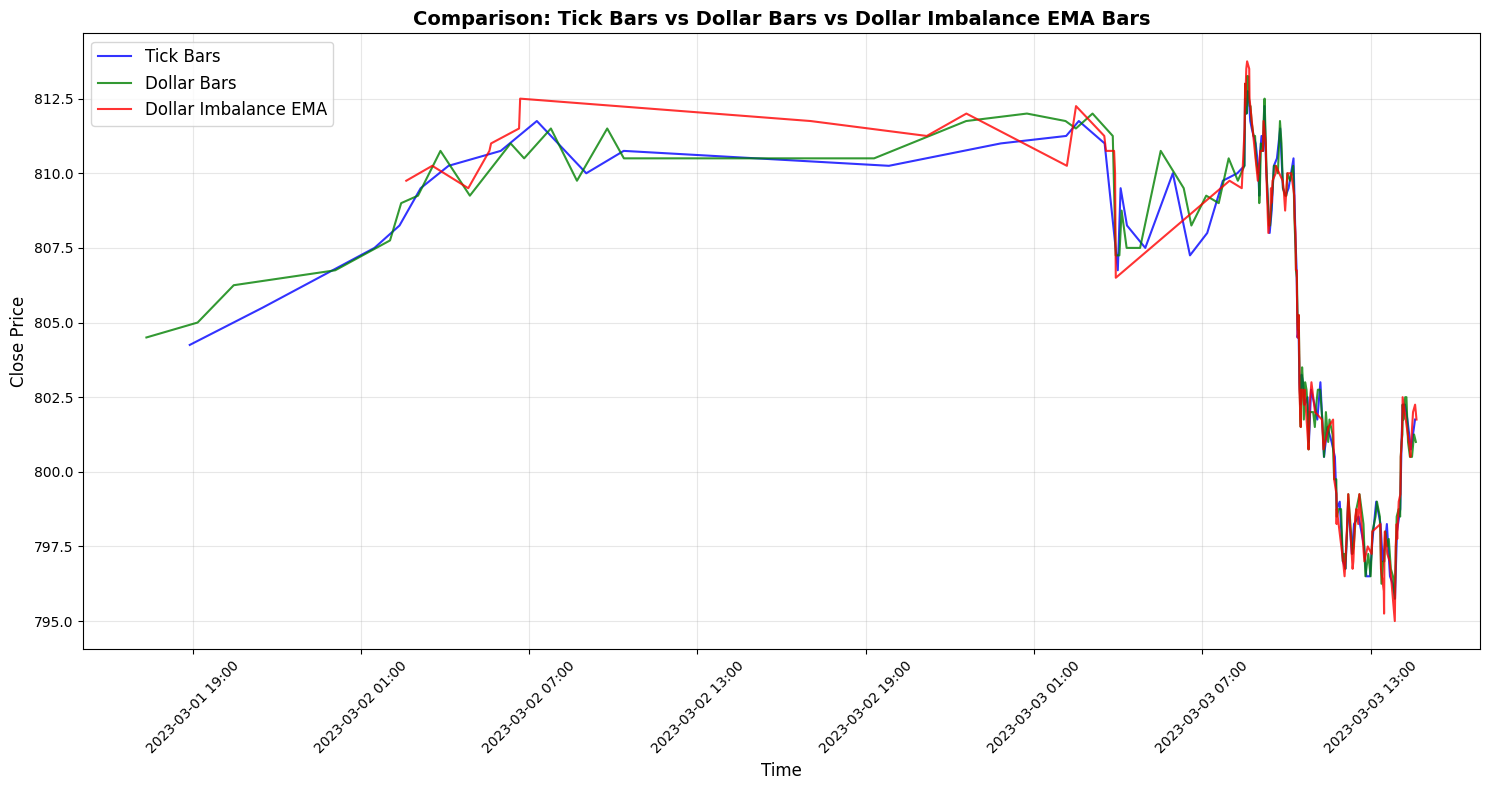

=== DETAILED COMPARISON STATISTICS ===
Tick Bars:
  - Number of bars: 99
  - Time range: 2023-03-01 18:53:51.423000 to 2023-03-03 14:34:59.977000
  - Price range: $795.75 - $812.75
  - Average close price: $805.35
  - Price volatility (std): $5.41

Dollar Bars:
  - Number of bars: 164
  - Time range: 2023-03-01 17:21:07.831000 to 2023-03-03 14:36:46.895000
  - Price range: $795.75 - $813.25
  - Average close price: $805.26
  - Price volatility (std): $5.46

Dollar Imbalance EMA Bars:
  - Number of bars: 130
  - Time range: 2023-03-02 02:36:59.979000 to 2023-03-03 14:38:08.007000
  - Price range: $795.00 - $813.75
  - Average close price: $804.55
  - Price volatility (std): $5.62

=== SAMPLING FREQUENCY COMPARISON ===
Tick Bars: 1 bar per 5500 ticks
Dollar Bars: 1 bar per $10000000 traded
Dollar Imbalance EMA: Adaptive based on order flow imbalance


In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Create a single plot comparing all three bar types
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Plot all three bar types on the same axes
ax.plot(tick_bars.index, tick_bars['close'], 'b-', linewidth=1.5, label='Tick Bars', alpha=0.8)
ax.plot(dollar_bars.index, dollar_bars['close'], 'g-', linewidth=1.5, label='Dollar Bars', alpha=0.8)
ax.plot(dollar_imbalance_ema.index, dollar_imbalance_ema['close'], 'r-', linewidth=1.5, label='Dollar Imbalance EMA', alpha=0.8)

# Customize the plot
ax.set_title('Comparison: Tick Bars vs Dollar Bars vs Dollar Imbalance EMA Bars', fontsize=14, fontweight='bold')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Close Price', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

# Format x-axis for better readability
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Print detailed comparison statistics
print("=== DETAILED COMPARISON STATISTICS ===")
print(f"Tick Bars:")
print(f"  - Number of bars: {len(tick_bars)}")
print(f"  - Time range: {tick_bars.index.min()} to {tick_bars.index.max()}")
print(f"  - Price range: ${tick_bars['close'].min():.2f} - ${tick_bars['close'].max():.2f}")
print(f"  - Average close price: ${tick_bars['close'].mean():.2f}")
print(f"  - Price volatility (std): ${tick_bars['close'].std():.2f}")

print(f"\nDollar Bars:")
print(f"  - Number of bars: {len(dollar_bars)}")
print(f"  - Time range: {dollar_bars.index.min()} to {dollar_bars.index.max()}")
print(f"  - Price range: ${dollar_bars['close'].min():.2f} - ${dollar_bars['close'].max():.2f}")
print(f"  - Average close price: ${dollar_bars['close'].mean():.2f}")
print(f"  - Price volatility (std): ${dollar_bars['close'].std():.2f}")

print(f"\nDollar Imbalance EMA Bars:")
print(f"  - Number of bars: {len(dollar_imbalance_ema)}")
print(f"  - Time range: {dollar_imbalance_ema.index.min()} to {dollar_imbalance_ema.index.max()}")
print(f"  - Price range: ${dollar_imbalance_ema['close'].min():.2f} - ${dollar_imbalance_ema['close'].max():.2f}")
print(f"  - Average close price: ${dollar_imbalance_ema['close'].mean():.2f}")
print(f"  - Price volatility (std): ${dollar_imbalance_ema['close'].std():.2f}")

# Show the sampling frequency comparison
print(f"\n=== SAMPLING FREQUENCY COMPARISON ===")
print(f"Tick Bars: 1 bar per {5500} ticks")
print(f"Dollar Bars: 1 bar per ${10000000} traded")
print(f"Dollar Imbalance EMA: Adaptive based on order flow imbalance")

=== SERIAL CORRELATION ANALYSIS ===

DOLLAR BARS - Serial Correlation:
  Lag 1: -0.0625 (p-value: 0.4294) 
  Lag 2: -0.0377 (p-value: 0.6347) 
  Lag 3: -0.0652 (p-value: 0.4128) 
  Lag 4: 0.0916 (p-value: 0.2511) 
  Lag 5: 0.0579 (p-value: 0.4696) 
  Lag 6: -0.1204 (p-value: 0.1330) 
  Lag 7: 0.0137 (p-value: 0.8650) 
  Lag 8: 0.0821 (p-value: 0.3096) 
  Lag 9: 0.0279 (p-value: 0.7316) 
  Lag 10: -0.0203 (p-value: 0.8037) 

DOLLAR IMBALANCE EMA BARS - Serial Correlation:
  Lag 1: -0.0771 (p-value: 0.3870) 
  Lag 2: -0.0365 (p-value: 0.6837) 
  Lag 3: -0.1014 (p-value: 0.2583) 
  Lag 4: -0.1379 (p-value: 0.1251) 
  Lag 5: 0.2183 (p-value: 0.0149) *
  Lag 6: 0.0585 (p-value: 0.5204) 
  Lag 7: 0.0548 (p-value: 0.5491) 
  Lag 8: -0.0465 (p-value: 0.6125) 
  Lag 9: -0.1644 (p-value: 0.0727) 
  Lag 10: -0.0418 (p-value: 0.6516) 


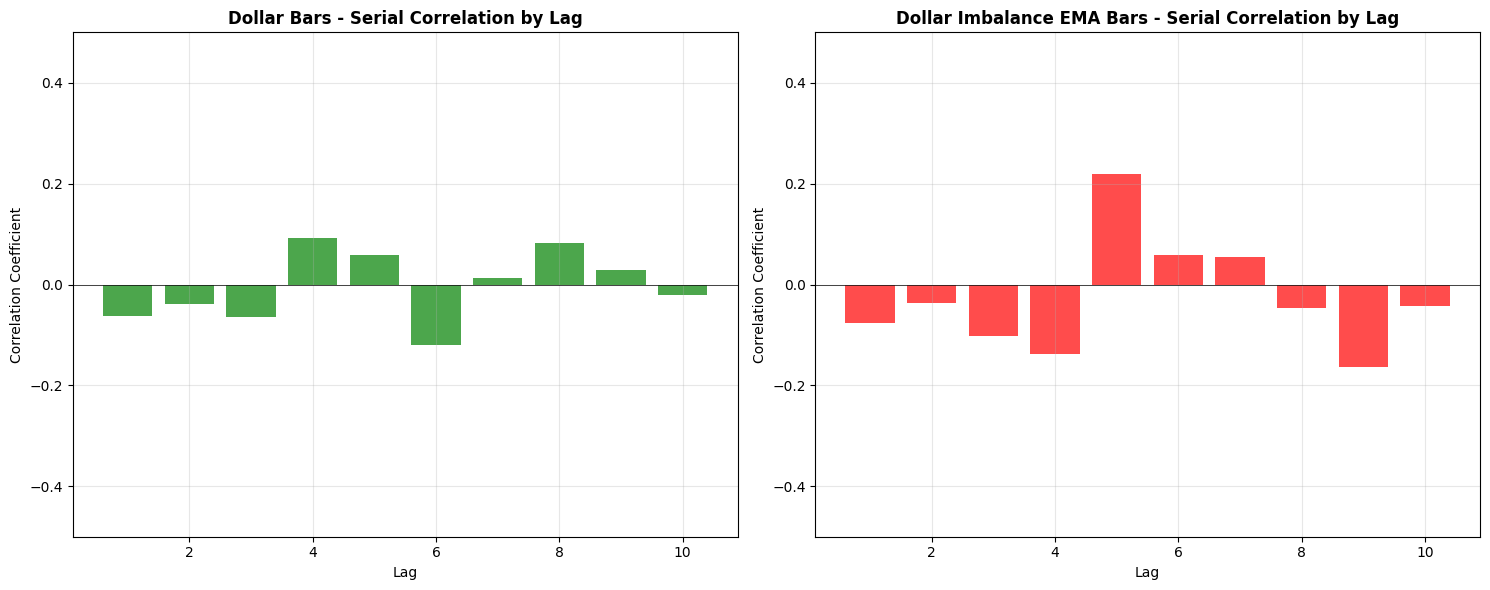


=== SUMMARY STATISTICS ===
Dollar Bars Returns:
  - Mean: -0.000026
  - Std: 0.001231
  - Skewness: -0.1557
  - Kurtosis: 1.0156
  - Number of observations: 163

Dollar Imbalance EMA Returns:
  - Mean: -0.000076
  - Std: 0.001248
  - Skewness: 0.0742
  - Kurtosis: 0.6968
  - Number of observations: 129

=== LJUNG-BOX TEST FOR SERIAL CORRELATION ===

Dollar Bars - Ljung-Box Test:
  Lags with significant serial correlation (p < 0.05):
    No significant serial correlation detected

Dollar Imbalance EMA - Ljung-Box Test:
  Lags with significant serial correlation (p < 0.05):
    No significant serial correlation detected

*** = p < 0.001, ** = p < 0.01, * = p < 0.05


In [19]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Calculate returns for both bar types
dollar_bars_returns = dollar_bars['close'].pct_change().dropna()
dollar_imbalance_ema_returns = dollar_imbalance_ema['close'].pct_change().dropna()

# Function to calculate serial correlation at different lags
def calculate_serial_correlation(returns, max_lags=10):
    """Calculate serial correlation (autocorrelation) for different lags"""
    correlations = {}
    p_values = {}
    
    for lag in range(1, max_lags + 1):
        # Calculate correlation between returns and lagged returns
        corr, p_value = stats.pearsonr(returns[lag:], returns[:-lag])
        correlations[lag] = corr
        p_values[lag] = p_value
    
    return correlations, p_values

# Calculate serial correlations
print("=== SERIAL CORRELATION ANALYSIS ===")

# Dollar Bars
dollar_bars_corr, dollar_bars_pval = calculate_serial_correlation(dollar_bars_returns, max_lags=10)
print("\nDOLLAR BARS - Serial Correlation:")
for lag in range(1, 11):
    significance = "***" if dollar_bars_pval[lag] < 0.001 else "**" if dollar_bars_pval[lag] < 0.01 else "*" if dollar_bars_pval[lag] < 0.05 else ""
    print(f"  Lag {lag}: {dollar_bars_corr[lag]:.4f} (p-value: {dollar_bars_pval[lag]:.4f}) {significance}")

# Dollar Imbalance EMA Bars
dollar_imbalance_corr, dollar_imbalance_pval = calculate_serial_correlation(dollar_imbalance_ema_returns, max_lags=10)
print("\nDOLLAR IMBALANCE EMA BARS - Serial Correlation:")
for lag in range(1, 11):
    significance = "***" if dollar_imbalance_pval[lag] < 0.001 else "**" if dollar_imbalance_pval[lag] < 0.01 else "*" if dollar_imbalance_pval[lag] < 0.05 else ""
    print(f"  Lag {lag}: {dollar_imbalance_corr[lag]:.4f} (p-value: {dollar_imbalance_pval[lag]:.4f}) {significance}")

# Plot comparison of serial correlations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Dollar Bars serial correlation
lags = list(range(1, 11))
dollar_bars_corr_values = [dollar_bars_corr[lag] for lag in lags]
ax1.bar(lags, dollar_bars_corr_values, alpha=0.7, color='green')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax1.set_title('Dollar Bars - Serial Correlation by Lag', fontweight='bold')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Correlation Coefficient')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.5, 0.5)

# Plot Dollar Imbalance EMA serial correlation
dollar_imbalance_corr_values = [dollar_imbalance_corr[lag] for lag in lags]
ax2.bar(lags, dollar_imbalance_corr_values, alpha=0.7, color='red')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.set_title('Dollar Imbalance EMA Bars - Serial Correlation by Lag', fontweight='bold')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Correlation Coefficient')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.5, 0.5)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== SUMMARY STATISTICS ===")
print(f"Dollar Bars Returns:")
print(f"  - Mean: {dollar_bars_returns.mean():.6f}")
print(f"  - Std: {dollar_bars_returns.std():.6f}")
print(f"  - Skewness: {dollar_bars_returns.skew():.4f}")
print(f"  - Kurtosis: {dollar_bars_returns.kurtosis():.4f}")
print(f"  - Number of observations: {len(dollar_bars_returns)}")

print(f"\nDollar Imbalance EMA Returns:")
print(f"  - Mean: {dollar_imbalance_ema_returns.mean():.6f}")
print(f"  - Std: {dollar_imbalance_ema_returns.std():.6f}")
print(f"  - Skewness: {dollar_imbalance_ema_returns.skew():.4f}")
print(f"  - Kurtosis: {dollar_imbalance_ema_returns.kurtosis():.4f}")
print(f"  - Number of observations: {len(dollar_imbalance_ema_returns)}")

# Ljung-Box test for serial correlation (more formal test)

try:
    # Test for serial correlation using Ljung-Box test
    from statsmodels.stats.diagnostic import acorr_ljungbox
    
    print(f"\n=== LJUNG-BOX TEST FOR SERIAL CORRELATION ===")
    
    # Dollar Bars
    lb_dollar = acorr_ljungbox(dollar_bars_returns, lags=10, return_df=True)
    print(f"\nDollar Bars - Ljung-Box Test:")
    print(f"  Lags with significant serial correlation (p < 0.05):")
    significant_lags_dollar = lb_dollar[lb_dollar['lb_pvalue'] < 0.05]
    if len(significant_lags_dollar) > 0:
        for lag in significant_lags_dollar.index:
            print(f"    Lag {lag}: LB-stat = {lb_dollar.loc[lag, 'lb_stat']:.4f}, p-value = {lb_dollar.loc[lag, 'lb_pvalue']:.4f}")
    else:
        print("    No significant serial correlation detected")
    
    # Dollar Imbalance EMA
    lb_imbalance = acorr_ljungbox(dollar_imbalance_ema_returns, lags=10, return_df=True)
    print(f"\nDollar Imbalance EMA - Ljung-Box Test:")
    print(f"  Lags with significant serial correlation (p < 0.05):")
    significant_lags_imbalance = lb_imbalance[lb_imbalance['lb_pvalue'] < 0.05]
    if len(significant_lags_imbalance) > 0:
        for lag in significant_lags_imbalance.index:
            print(f"    Lag {lag}: LB-stat = {lb_imbalance.loc[lag, 'lb_stat']:.4f}, p-value = {lb_imbalance.loc[lag, 'lb_pvalue']:.4f}")
    else:
        print("    No significant serial correlation detected")
        
except ImportError:
    print("\nNote: Install statsmodels for Ljung-Box test: pip install statsmodels")

print(f"\n*** = p < 0.001, ** = p < 0.01, * = p < 0.05")

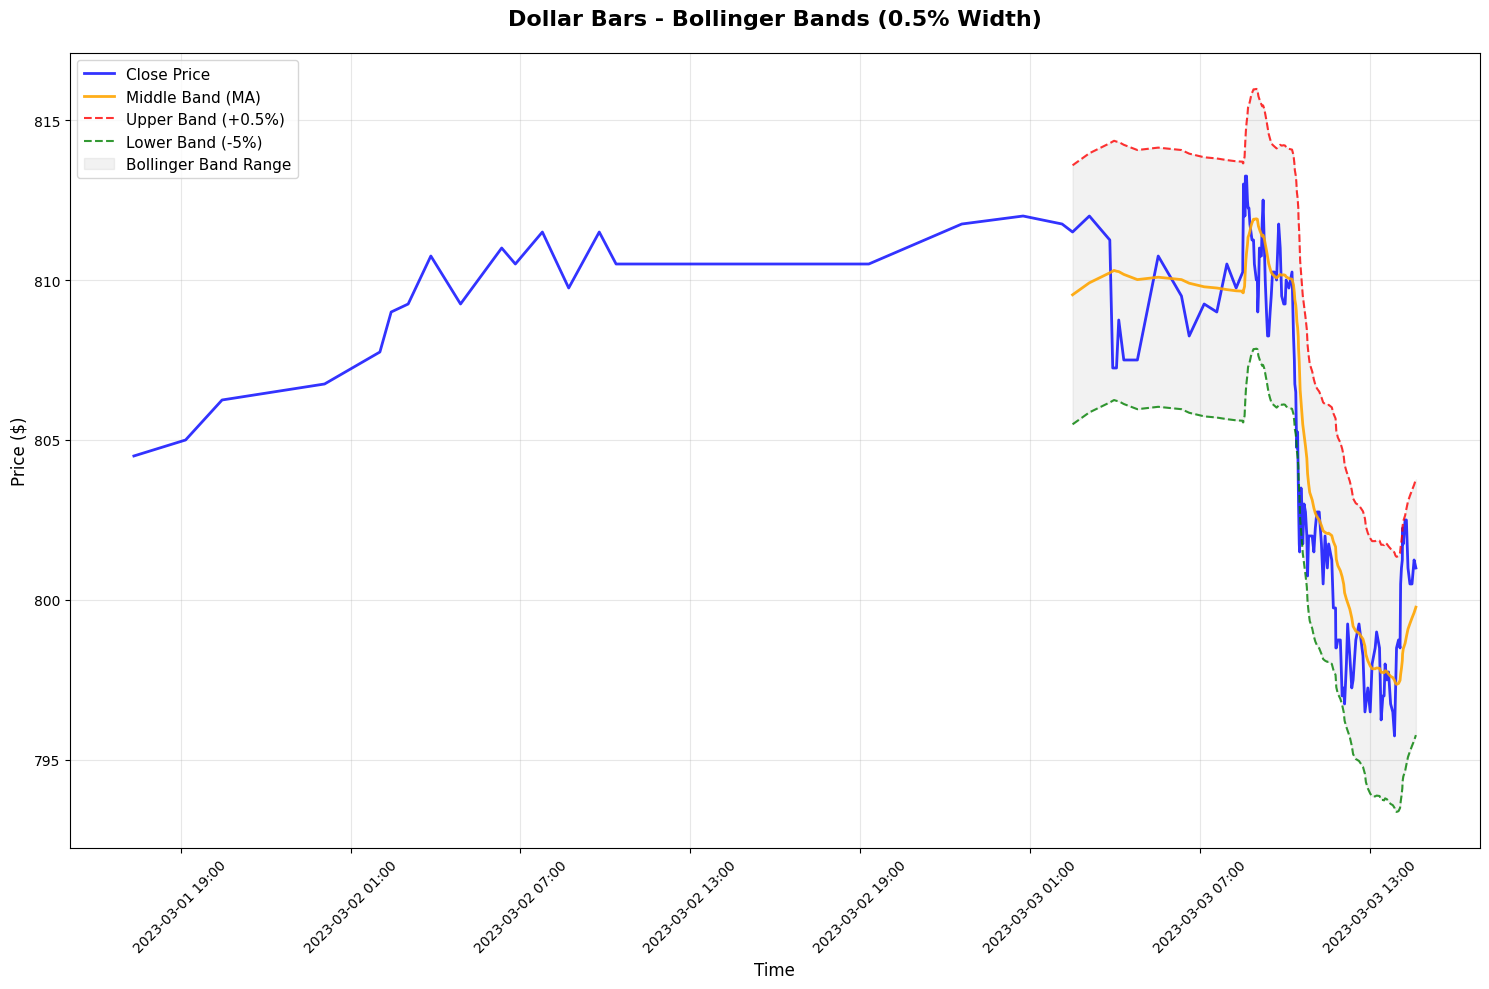

=== BOLLINGER BANDS STATISTICS ===
Total observations: 145
Price range: $795.75 - $813.25

Band Statistics (last 10 observations):
  2023-03-03 14:07:59: Price=$801.25, Lower=$794.11, Upper=$802.09
  2023-03-03 14:08:33: Price=$802.25, Lower=$794.32, Upper=$802.30
  2023-03-03 14:10:04: Price=$801.75, Lower=$794.48, Upper=$802.47
  2023-03-03 14:13:58: Price=$802.50, Lower=$794.66, Upper=$802.64
  2023-03-03 14:16:36: Price=$802.50, Lower=$794.86, Upper=$802.84
  2023-03-03 14:20:00: Price=$801.00, Lower=$795.09, Upper=$803.08
  2023-03-03 14:24:08: Price=$800.50, Lower=$795.27, Upper=$803.26
  2023-03-03 14:28:32: Price=$800.50, Lower=$795.44, Upper=$803.43
  2023-03-03 14:32:56: Price=$801.25, Lower=$795.60, Upper=$803.60
  2023-03-03 14:36:46: Price=$801.00, Lower=$795.78, Upper=$803.77

=== BAND BREACH ANALYSIS ===
Upper band breaches: 0 (0.0%)
Lower band breaches: 4 (2.8%)
Total breaches: 4 (2.8%)

=== CURRENT POSITION ===
Current price: $801.00
Upper band: $803.77
Middle band: $7

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def calculate_bollinger_bands(prices, window=20, width_pct=0.005):
    """
    Calculate Bollinger Bands
    
    Parameters:
    prices: pandas Series of prices
    window: rolling window for moving average (default 20)
    width_pct: width as percentage (0.005 = 5%)
    
    Returns:
    DataFrame with middle_band, upper_band, lower_band
    """
    # Calculate moving average (middle band)
    middle_band = prices.rolling(window=window).mean()
    
    # Calculate standard deviation
    rolling_std = prices.rolling(window=window).std()
    
    # Calculate bands using percentage width
    # For 5% width, we use width_pct to determine the band distance
    upper_band = middle_band * (1 + width_pct)
    lower_band = middle_band * (1 - width_pct)
    
    return pd.DataFrame({
        'middle_band': middle_band,
        'upper_band': upper_band,
        'lower_band': lower_band,
        'price': prices
    })

# Calculate Bollinger Bands for dollar_bars
bb_data = calculate_bollinger_bands(dollar_bars['close'], window=20, width_pct=0.005)

# Create the chart
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the price and Bollinger Bands
ax.plot(dollar_bars.index, bb_data['price'], 'b-', linewidth=2, label='Close Price', alpha=0.8)
ax.plot(dollar_bars.index, bb_data['middle_band'], 'orange', linewidth=2, label='Middle Band (MA)', alpha=0.9)
ax.plot(dollar_bars.index, bb_data['upper_band'], 'r--', linewidth=1.5, label='Upper Band (+0.5%)', alpha=0.8)
ax.plot(dollar_bars.index, bb_data['lower_band'], 'g--', linewidth=1.5, label='Lower Band (-5%)', alpha=0.8)

# Fill the area between bands
ax.fill_between(dollar_bars.index, bb_data['upper_band'], bb_data['lower_band'], 
                alpha=0.1, color='gray', label='Bollinger Band Range')

# Customize the plot
ax.set_title('Dollar Bars - Bollinger Bands (0.5% Width)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11, loc='upper left')

# Format x-axis for better readability
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Print statistics
print("=== BOLLINGER BANDS STATISTICS ===")
print(f"Total observations: {len(bb_data.dropna())}")
print(f"Price range: ${bb_data['price'].min():.2f} - ${bb_data['price'].max():.2f}")
print(f"\nBand Statistics (last 10 observations):")
recent_data = bb_data.tail(10).dropna()
for i, (idx, row) in enumerate(recent_data.iterrows()):
    print(f"  {idx.strftime('%Y-%m-%d %H:%M:%S')}: "
          f"Price=${row['price']:.2f}, "
          f"Lower=${row['lower_band']:.2f}, "
          f"Upper=${row['upper_band']:.2f}")

# Calculate band touches/breaches
upper_breaches = (bb_data['price'] > bb_data['upper_band']).sum()
lower_breaches = (bb_data['price'] < bb_data['lower_band']).sum()
total_valid_points = len(bb_data.dropna())

print(f"\n=== BAND BREACH ANALYSIS ===")
print(f"Upper band breaches: {upper_breaches} ({upper_breaches/total_valid_points*100:.1f}%)")
print(f"Lower band breaches: {lower_breaches} ({lower_breaches/total_valid_points*100:.1f}%)")
print(f"Total breaches: {upper_breaches + lower_breaches} ({(upper_breaches + lower_breaches)/total_valid_points*100:.1f}%)")

# Show current position relative to bands
last_price = bb_data['price'].iloc[-1]
last_upper = bb_data['upper_band'].iloc[-1]
last_lower = bb_data['lower_band'].iloc[-1]
last_middle = bb_data['middle_band'].iloc[-1]

print(f"\n=== CURRENT POSITION ===")
print(f"Current price: ${last_price:.2f}")
print(f"Upper band: ${last_upper:.2f}")
print(f"Middle band: ${last_middle:.2f}")
print(f"Lower band: ${last_lower:.2f}")

if last_price > last_upper:
    print("Position: ABOVE upper band (potentially overbought)")
elif last_price < last_lower:
    print("Position: BELOW lower band (potentially oversold)")
else:
    band_position = (last_price - last_lower) / (last_upper - last_lower) * 100
    print(f"Position: {band_position:.1f}% within bands")